In [1]:
from ivc import ivc
import matplotlib.pyplot as plt
import sys

In [2]:
myvc = ivc.VC()

In [3]:
### Define some functions
### Add the @myvc.add_vc() decorator to implement version control

@myvc.add_vc(capturing=False)
def func1(arg1,arg2):
    print (f"A1 is {arg1} A2 is {arg2}")
    print (arg1+arg2)
    return arg1    
    
@myvc.add_vc(comment="Comments are optional")
def func2(arg1,arg2):
    print (arg1(arg2))
    print ("This applies to us all")
       
@myvc.add_vc(comment="prints a figure")
def func3():
    plt.plot([1,2,3,6])
    plt.show()
    print("with the get down",file=sys.stderr)
    print("livin in a california cage")

In [4]:
### Change definitions in normal course of data exploration / debugging

@myvc.add_vc(capturing=False,comment="Changed order")
def func1(arg1,arg2):
    print (f"A1 is {arg2} A2 is {arg1}")
    print (arg1+arg2)
        
    
@myvc.add_vc()
def func2(arg1,arg2):
    print (arg1(arg2))
    print ("This applies to us me")
    return True
       

In [5]:
### List of all past edits to the functions
### this function gives you a list of dataframes for each stored function, you can also just inspect `myvc.versions`
versions = myvc.get_entries()
for v in versions:
    display(versions[v])

,source,timestamp,comment,count
func1,,,,
37c34cf96f7dc8a070f01282ce7b563d,"@myvc.add_vc(capturing=False)\ndef func1(arg1,...",2020-07-26T15:41:54.540040,,0
ebf1e620f435e3ff721743bb194b710c,"@myvc.add_vc(capturing=False,comment=""Changed ...",2020-07-26T15:41:54.555160,Changed order,0


,source,timestamp,comment,count
func2,,,,
6254079660f3b3621a145dacc97c853d,"@myvc.add_vc(comment=""Comments are optional"")\...",2020-07-26T15:41:54.540817,Comments are optional,0
aafc5c3e7fbf34bf5c4d9804df198895,"@myvc.add_vc()\ndef func2(arg1,arg2):\n pri...",2020-07-26T15:41:54.556503,,0


,comment,count,source,timestamp
func3,,,,
541d4fc3e71d99418e77efbe94550fcd,prints a figure,0,"@myvc.add_vc(comment=""prints a figure"")\ndef f...",2020-07-26T15:41:54.541696


In [6]:
#see the changes you made

for v in versions:
    if len(versions[v])>1:
        for r in myvc.diff(v,versions[v].index[0],versions[v].index[1]):    
            print (r.strip())



- @myvc.add_vc(capturing=False)
+ @myvc.add_vc(capturing=False,comment="Changed order")
def func1(arg1,arg2):
-     print (f"A1 is {arg1} A2 is {arg2}")
?                        ^            ^
+     print (f"A1 is {arg2} A2 is {arg1}")
?                        ^            ^
print (arg1+arg2)
-     return arg1

- @myvc.add_vc(comment="Comments are optional")
+ @myvc.add_vc()
def func2(arg1,arg2):
print (arg1(arg2))
-     print ("This applies to us all")
?                                ^^^
+     print ("This applies to us me")
?                                ^^
+     return True



In [7]:
# run the functions a few times
func1(1,2)

A1 is 2 A2 is 1
3


In [8]:
func2(lambda x:x*x,4)

16
This applies to us me


True

livin in a california cage


with the get down


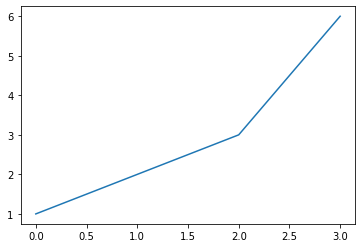

In [9]:
func3()

party and bullshit


with the get down


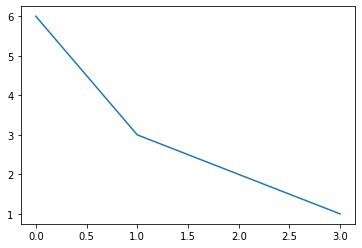

In [10]:
@myvc.add_vc(comment="prints a figure")
def func3():
    plt.plot([1,2,3,6][::-1])
    plt.show()
    print("with the get down",file=sys.stderr)
    print("party and bullshit")
    
func3()

func1 : 37c34cf96f7dc8a070f01282ce7b563d
func1 : ebf1e620f435e3ff721743bb194b710c
func2 : 6254079660f3b3621a145dacc97c853d
func2 : aafc5c3e7fbf34bf5c4d9804df198895
16
This applies to us me

func3 : 541d4fc3e71d99418e77efbe94550fcd
livin in a california cage




with the get down



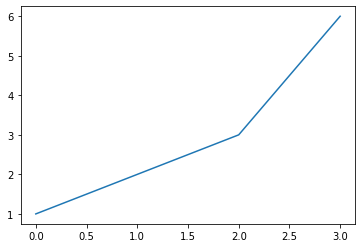

func3 : 54c3d5d9a1d1e193364808ffd32e000d
party and bullshit



with the get down



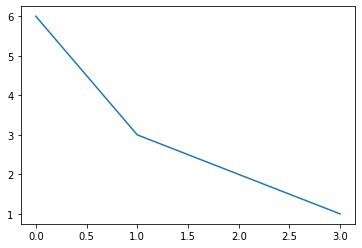

In [11]:
# loop through and use the build in `display` function to look at output produced
versions = myvc.get_entries()
for v in versions:
    for i in versions[v].index:
        print (v,":",i)
        myvc.display(v,i) 

In [12]:
myvc.summary(func3) # pass a function or nothing to get a summary of how many times it was run

{'541d4fc3e71d99418e77efbe94550fcd': 1, '54c3d5d9a1d1e193364808ffd32e000d': 1}

In [13]:
# you can look at the raw data stored if you don't want to see it as a dataframe
myvc.versions

{'func1': {'37c34cf96f7dc8a070f01282ce7b563d': {'source': '@myvc.add_vc(capturing=False)\ndef func1(arg1,arg2):\n    print (f"A1 is {arg1} A2 is {arg2}")\n    print (arg1+arg2)\n    return arg1    \n',
   'timestamp': '2020-07-26T15:41:54.540040',
   'comment': '',
   'count': 0},
  'ebf1e620f435e3ff721743bb194b710c': {'source': '@myvc.add_vc(capturing=False,comment="Changed order")\ndef func1(arg1,arg2):\n    print (f"A1 is {arg2} A2 is {arg1}")\n    print (arg1+arg2)\n',
   'timestamp': '2020-07-26T15:41:54.555160',
   'comment': 'Changed order',
   'count': 0}},
 'func2': {'6254079660f3b3621a145dacc97c853d': {'source': '@myvc.add_vc(comment="Comments are optional")\ndef func2(arg1,arg2):\n    print (arg1(arg2))\n    print ("This applies to us all")\n',
   'timestamp': '2020-07-26T15:41:54.540817',
   'comment': 'Comments are optional',
   'count': 0},
  'aafc5c3e7fbf34bf5c4d9804df198895': {'source': '@myvc.add_vc()\ndef func2(arg1,arg2):\n    print (arg1(arg2))\n    print ("This app